Exercicio 7

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = make_moons(n_samples=10000, noise=0.4)
X, y = dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

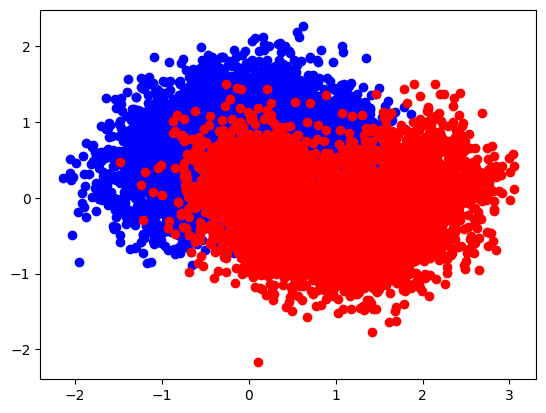

In [4]:
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], "bo")    # blue
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], "ro")    # red
plt.show()

In [5]:
model = DecisionTreeClassifier()
param_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)


Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV 1/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.764 total time=   0.0s
[CV 2/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.786 total time=   0.0s
[CV 3/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.777 total time=   0.0s
[CV 4/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.777 total time=   0.0s
[CV 5/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.772 total time=   0.0s
[CV 1/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.764 total time=   0.0s
[CV 2/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.786 total time=   0.0s
[CV 3/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.777 total time=   0.0s
[CV 4/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.777 total time=   0.0s
[CV 5/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.772 total time=   0.0s
[CV 1/5] END max_leaf_nodes=2, min_samples_split=4;, score=0.764 total time=   0.0s
[CV 2/5] END

In [9]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.859


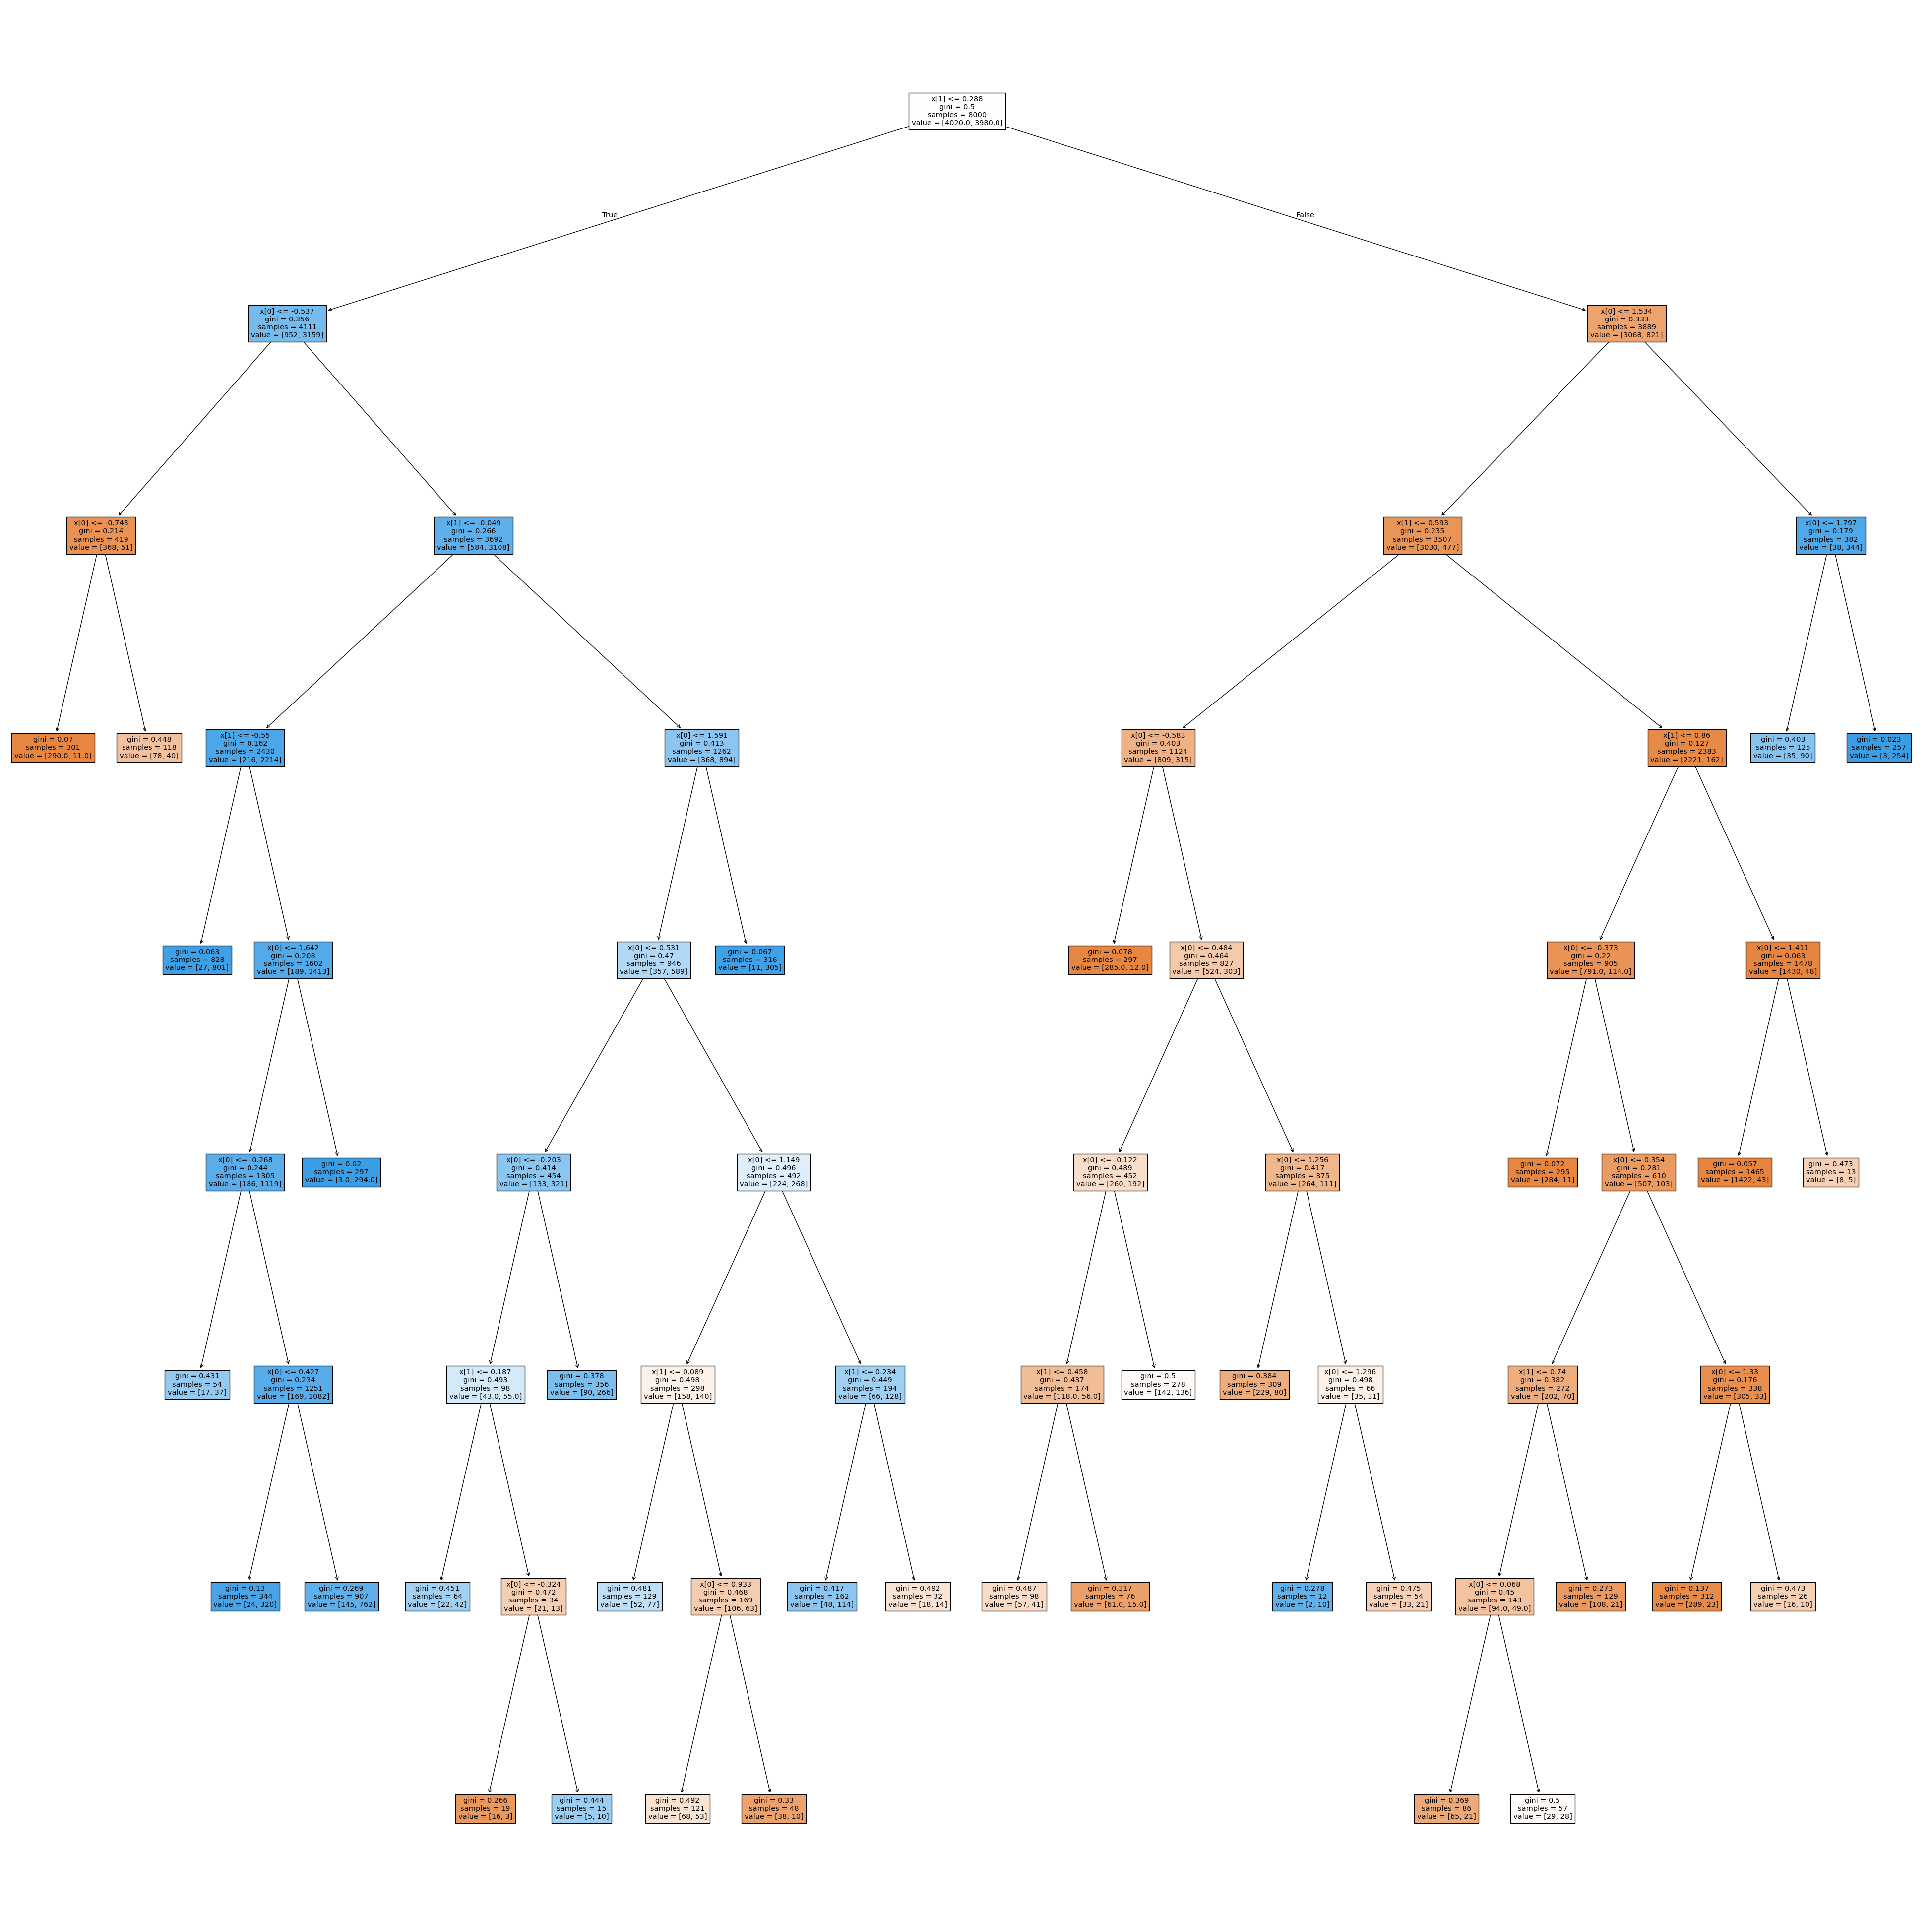

In [8]:
plt.figure(figsize=(50, 50))
plot_tree(grid_search.best_estimator_, filled=True)
plt.show()

Exercicio 8

In [10]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [11]:
from sklearn.base import clone

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7900580000000001

In [12]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [13]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [14]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.863